Makemore as the name suggests, "make more" of the thing it was given. In other word when given a dataset and ingested it, it will render back alike-value. In this case, we do it with a dataset of name.
We will implement five neural networks :
- Bigram (one character predict the following one based on a simple lookup table of count)
- Bag of words
- Multilayer Perceptron (feedforward and fully connected)
- Recurrent Neural Network
    - A RNN is a type of neural network designed to handle sequential data (like text, time series, or speech). Unlike standard neural networks, RNNs have loops that allow information to persist, meaning they can use previous outputs as inputs for the current step. This makes them suitable for tasks where context or order matters, such as language modeling or sequence prediction.
- Gated Recurrent Unit
    - GRUs are a special kind of RNN that use gating mechanisms to better capture long-term dependencies and avoid issues like vanishing gradients. GRUs have two main gates:
        - Update gate: Decides how much of the past information to keep.
        - Reset gate: Decides how to combine new input with previous memory.
- Transformer
    - A Transformer is a type of neural network architecture designed for handling sequential data, especially in natural language processing tasks. Unlike RNNs, GRUs, or LSTMs, Transformers do not process data sequentially. Instead, they use a mechanism called self-attention to weigh the importance of different words in a sequence, allowing them to capture relationships regardless of distance in the input.
        - Not an ensemble: A Transformer is not an ensemble of RNNs, GRUs, or LSTMs. It is a separate architecture.
        - Self-attention: Allows the model to focus on relevant parts of the input sequence for each output.
        - Parallel processing: Can process all tokens in a sequence at once, making it faster to train than RNNs.
        - Widely used: Forms the basis of models like BERT and GPT.


In [ ]:
# load dataset
words = open('names.txt', 'r').read().splitlines()

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [23]:
# get some statistic about the dataset
print(f'Number of names: {len(words)}')
print(f'Sum of unique characters: {len(set("".join(words)))}')
print(f'Shortest word {min(len(w) for w in words)} characters: {min(words, key=len)}')
print(f'Longest word {max(len(w) for w in words)} characters: {max(words, key=len)}')

Number of names: 32033
Sum of unique characters: 26
Shortest word 2 characters: an
Longest word 15 characters: muhammadibrahim


A characters language model use the past characters sequence to predict the next character. In other word in a simple word such as [charlotte], there is actually a lot of informations.
- After c likely comes h, 
- after h likely comes a, 
- etc.
- After charlotte, the word is likely to end.

First we will build the Bigram. A prediction fo the next character based on the current character. Very simple and weak model since it completly ignore any other information about the context (total size, full sequence of characters, some sequence tends to be smaller/bigger than others, etc.)

In [11]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(f'{ch1} -> {ch2}')

e -> m
m -> m
m -> a


In [13]:
# we create a special character to hallucinate the start and end of the string.
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(f'{ch1} -> {ch2}')

<S> -> e
e -> m
m -> m
m -> a
a -> <E>


In [17]:
# now we count each occurance of a character pair
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # same as b[bigram] + in case it's not in the dictionary, we return 0
b.items()  # this will return a list of tuples (key, value) pairs

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [18]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [32]:
# it is easier for us to store theses statistics in a 2 dimensional array rather than a dictionary. The row will be the first character and the column the second character. (in a way : 1st dimension = what am I currently; 2nd dimension = what is coming after me according to the dataset)
# for this, we use pytorch (deep learning neural network library)
import torch
N = torch.zeros([28,28], dtype=torch.int32) # dimension size is : amount of unique characters + 2 (for <S> and <E>)


In [ ]:
# Here, we need to transform our string (ie characters) into numbers(int32). we need a lookup table for this. Since the dataset is small, we can do it at once on memory but for larger datasets, we would need to do it in a more memory efficient way.

# 1. get the list of vocabulary
vocab = sorted(list(set(''.join(words))))
vocab = ['<S>'] + vocab + ['<E>']  # add start and end characters
# 2. create the lookup table
stoi = {s:i for i,s in enumerate(vocab)}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        # here we map the character to the corresponding index in the vocabulary
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1  # increment the count for the bigram (ix1, ix2)

tensor([[    0,  8820,  2612,  3084,  3380,  3062,   834,  1338,  1748,  1182,
          4844,  5926,  3144,  5076,  2292,   788,  1030,   184,  3278,  4110,
          2616,   156,   752,   614,   268,  1070,  1858,     0],
        [    0,  1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,
           350,  1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,
          1374,   762,  1668,   322,   364,  4100,   870, 13280],
        [    0,   642,    76,     2,   130,  1310,     0,     0,    82,   434,
             2,     0,   206,     0,     8,   210,     0,     0,  1684,    16,
             4,    90,     0,     0,     0,   166,     0,   228],
        [    0,  1630,     0,    84,     2,  1102,     0,     4,  1328,   542,
             6,   632,   232,     0,     0,   760,     2,    22,   152,    10,
            70,    70,     0,     0,     6,   208,     8,   194],
        [    0,  2606,     2,     6,   298,  2566,    10,    50,   236,  1348,
            18,     6,   

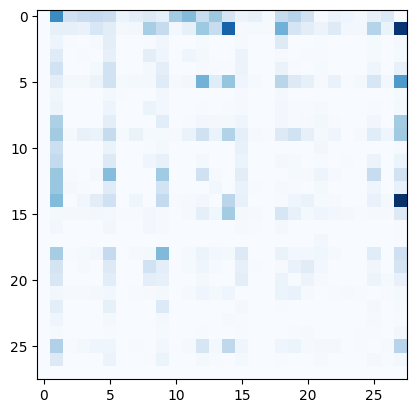

In [35]:
# let's visualise the array nicer with matpolib
import matplotlib.pyplot as plt
plt.imshow(N, cmap='Blues')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

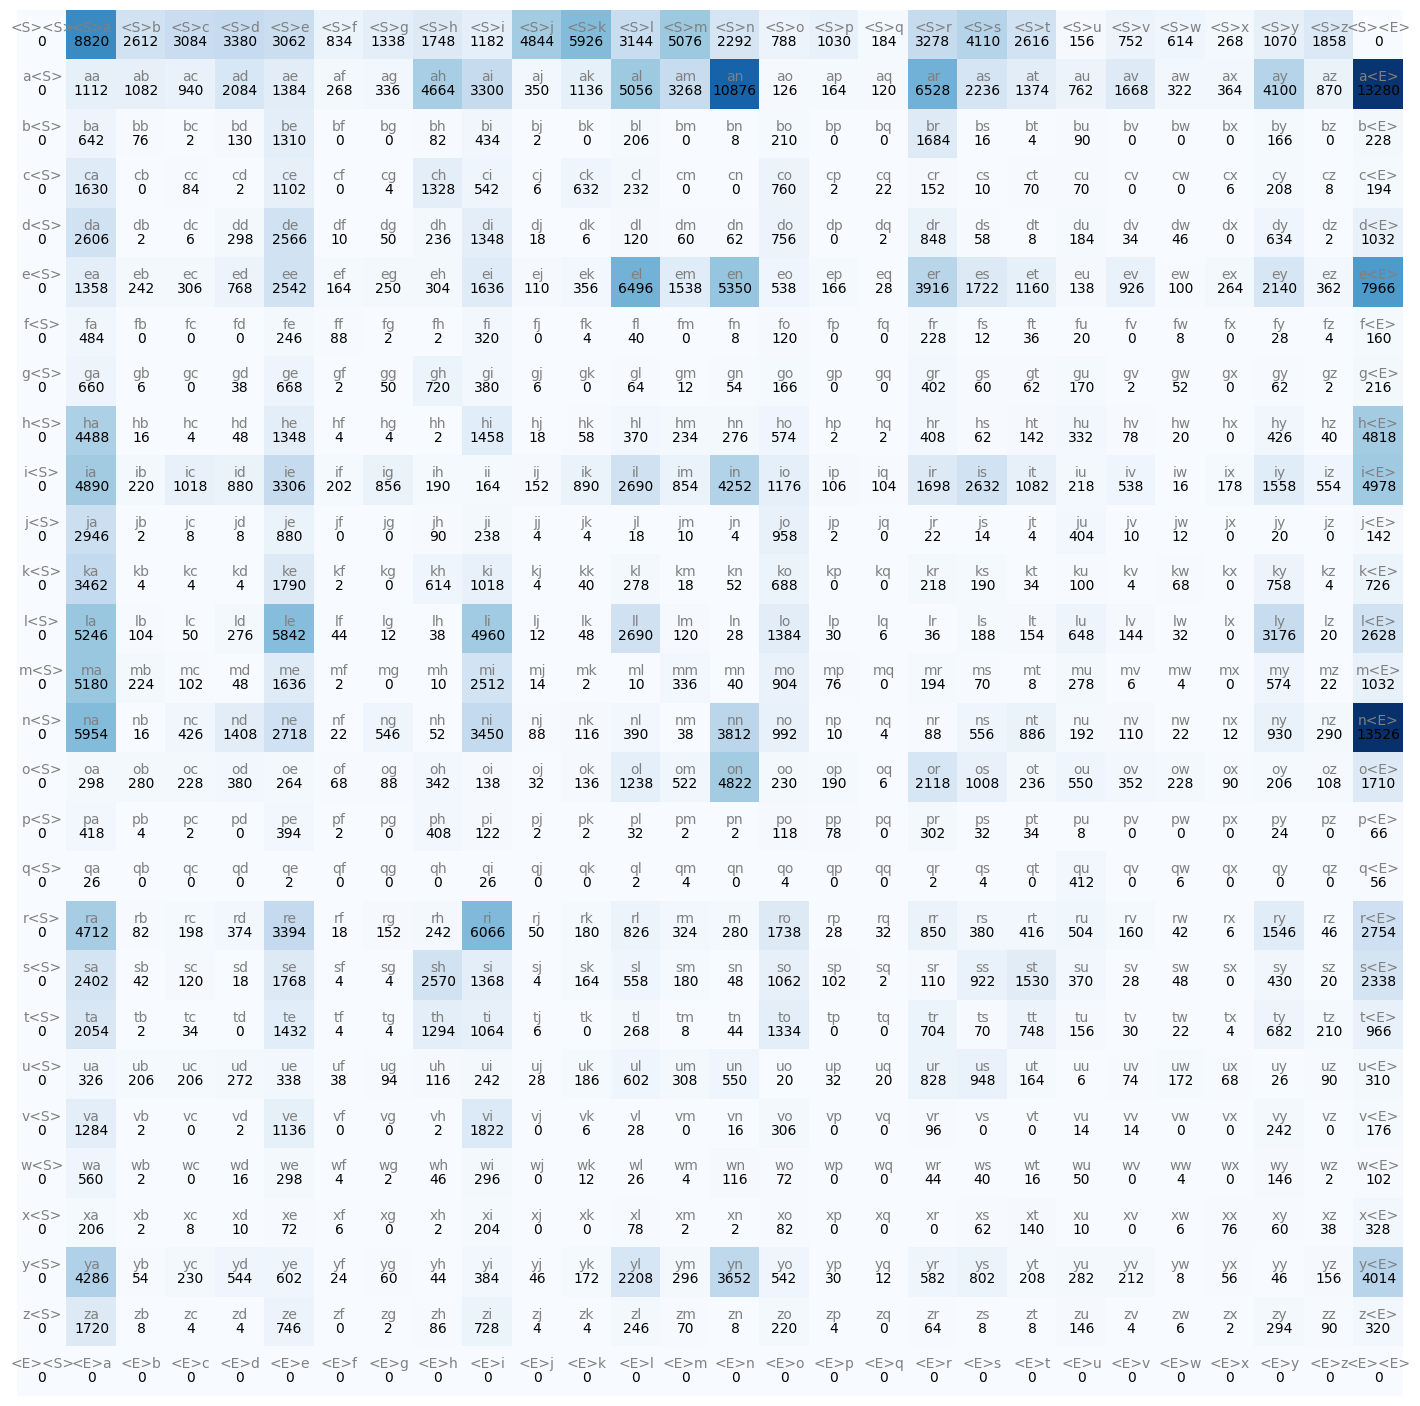

In [ ]:
# let's invert the array so we can start with the first character
itos = {i:s for s,i in stoi.items()}

%matplotlib inline

plt.figure(figsize=(18, 18))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chrstr = itos[i] + itos[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [ ]:
# remember that each element of this array are Tensors, not integers. To obtain the integer value, we need to call the .item() method on the Tensor.
N[2,2]

tensor(76, dtype=torch.int32)

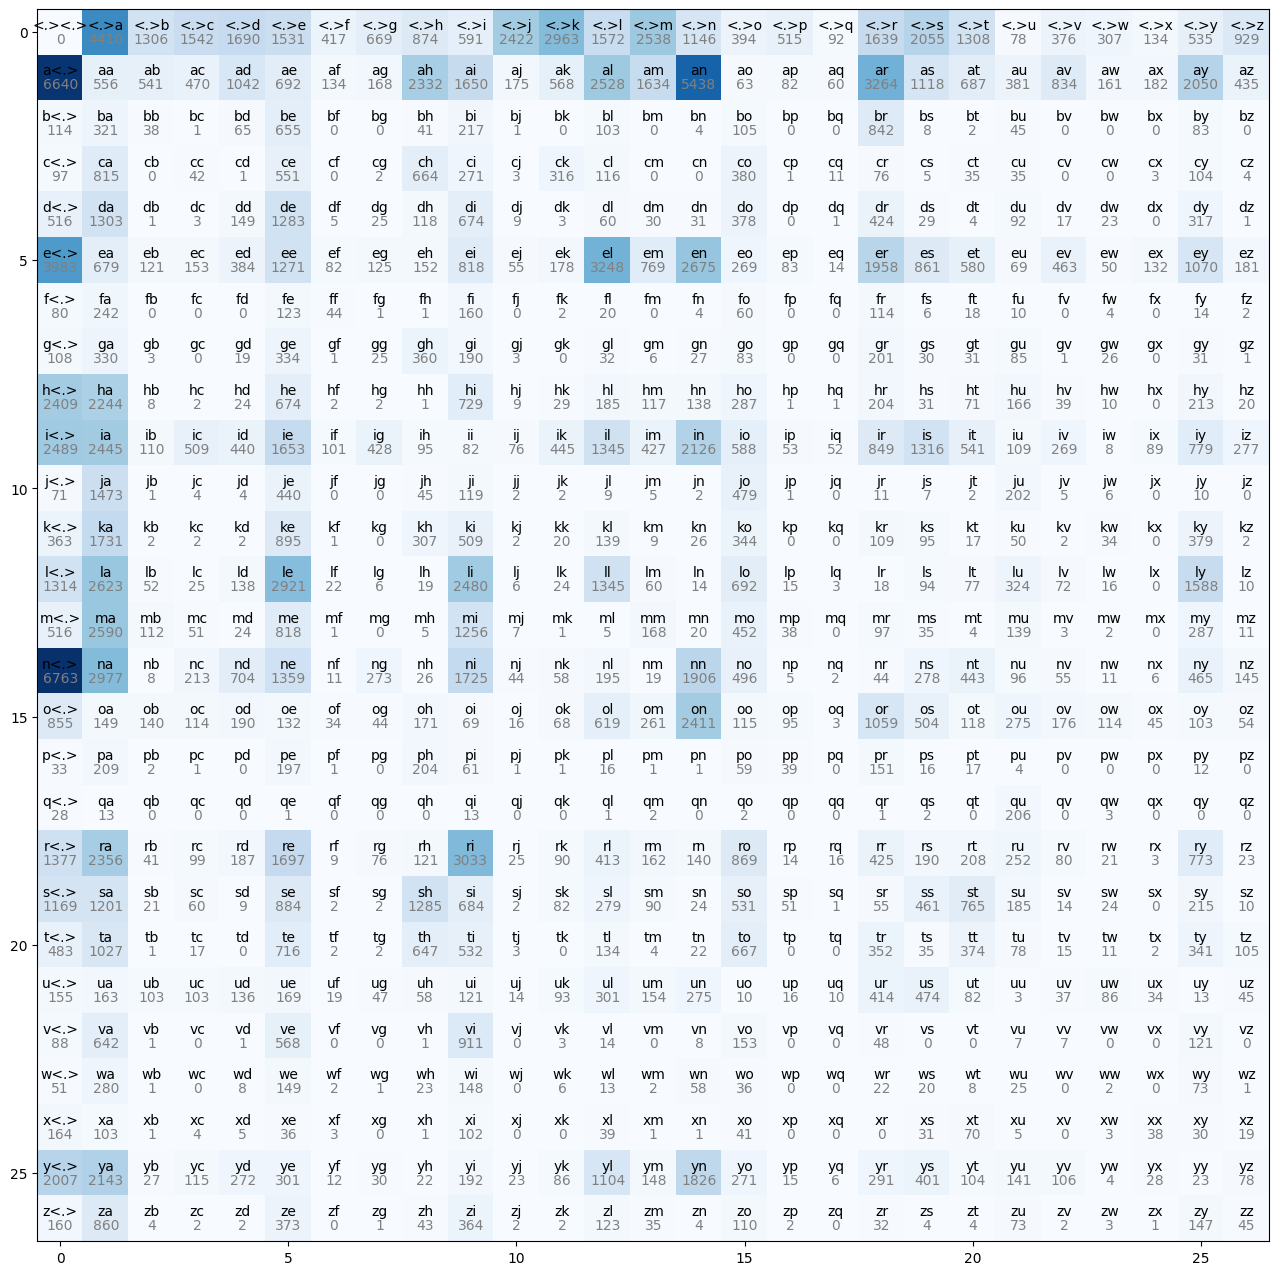

In [56]:
# now you may have seen a problem when vizualiting. One row and one column are only filled by 0. Theses are the columns with ending <S> and starting <E> characters. Theses bigram can never appear in a string. 
# also each of theses brackets (<S> and <E>) are really noisy.
# so let's make it simplier and cleaner.
N = torch.zeros([27,27], dtype=torch.int32)  # reset the array with only one special character

chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)} # we start the index at 1 so that we can use 0 for the special character
stoi['<.>'] = 0  # add only ONE special character
itos = {i:s for s,i in stoi.items()}

for w in words:
    chs = ['<.>'] + list(w) + ['<.>']  # use the special character for start and end
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):  # +1 for the special character
    for j in range(27):
        chrstr = itos[i] + itos[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='grey')